In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



file_path = '/content/house_renovation_data (3).csv'
house_data = pd.read_csv(file_path)


X = house_data.drop(columns=['Total Renovation Cost (INR)'])
y = house_data['Total Renovation Cost (INR)']


numerical_features = ['Bedrooms', 'Sqft Area', 'Price per Sqft (INR)', 'Toilets', 'Renovation Cost per Sqft (INR)']
categorical_features = ['Locality', 'Renovation Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


linear_model.fit(X_train, y_train)

y_pred_lr = linear_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")

print(f"R^2 Score: {r2_lr}")



Linear Regression
R^2 Score: 0.9487778761627373


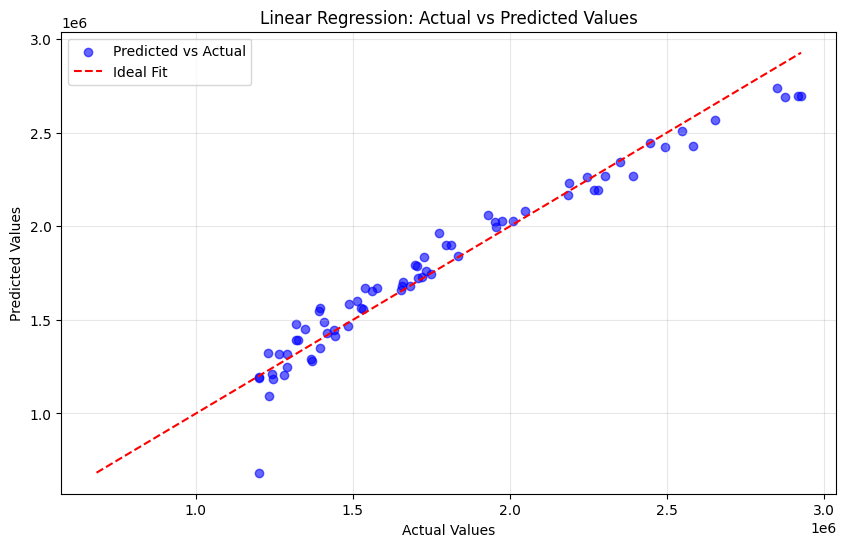

In [3]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plot the regression line (y=x for perfect prediction)
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')

# Plot settings
plt.title("Linear Regression: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [17]:
custom_input = [[3, 1000, 40000, 4, 2500, 'Urban', 'Moderate']]
custom_input_df = pd.DataFrame(custom_input, columns=numerical_features + categorical_features)


custom_prediction = linear_model.predict(custom_input_df)
print(f"Predicted Renovation Cost: {custom_prediction[0]*3} INR")


Predicted Renovation Cost: 2494642.7442292953 INR
